In [1]:
# https://data.austintexas.gov/browse?category=Locations+and+Maps&page=5
from math import radians, cos, sin, asin, sqrt, atan2
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
from descartes import PolygonPatch
import shapefile
from matplotlib.lines import Line2D
import warnings
import matplotlib.colors as colors
from shapely.geometry import Point
from matplotlib import pyplot
import numpy as np
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.set_option('display.max_columns', None)

In [2]:
roads_path = "C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Routes.shp"
roads = gpd.read_file(roads_path, encoding='utf-8')
roads.head(1)

ROUTE_ID                   ROUTENAME   DIRECTION ROUTECOLOR TEXTCOLOR  \
0         1  North Lamar/South Congress  Southbound     004A97    FFFFFF   

  ROUTETYPE ROUTETHEME SERVICENM SERVICETYP  SIGN_ID SERVICE_ID  \
0     Local       None   Weekday    Weekday      133      1-133   

          SOURCE  SOURCEDATE  \
0  Capital Metro  2020-01-31   

                                            geometry  
0  LINESTRING (627856.218 3365895.180, 627889.706...

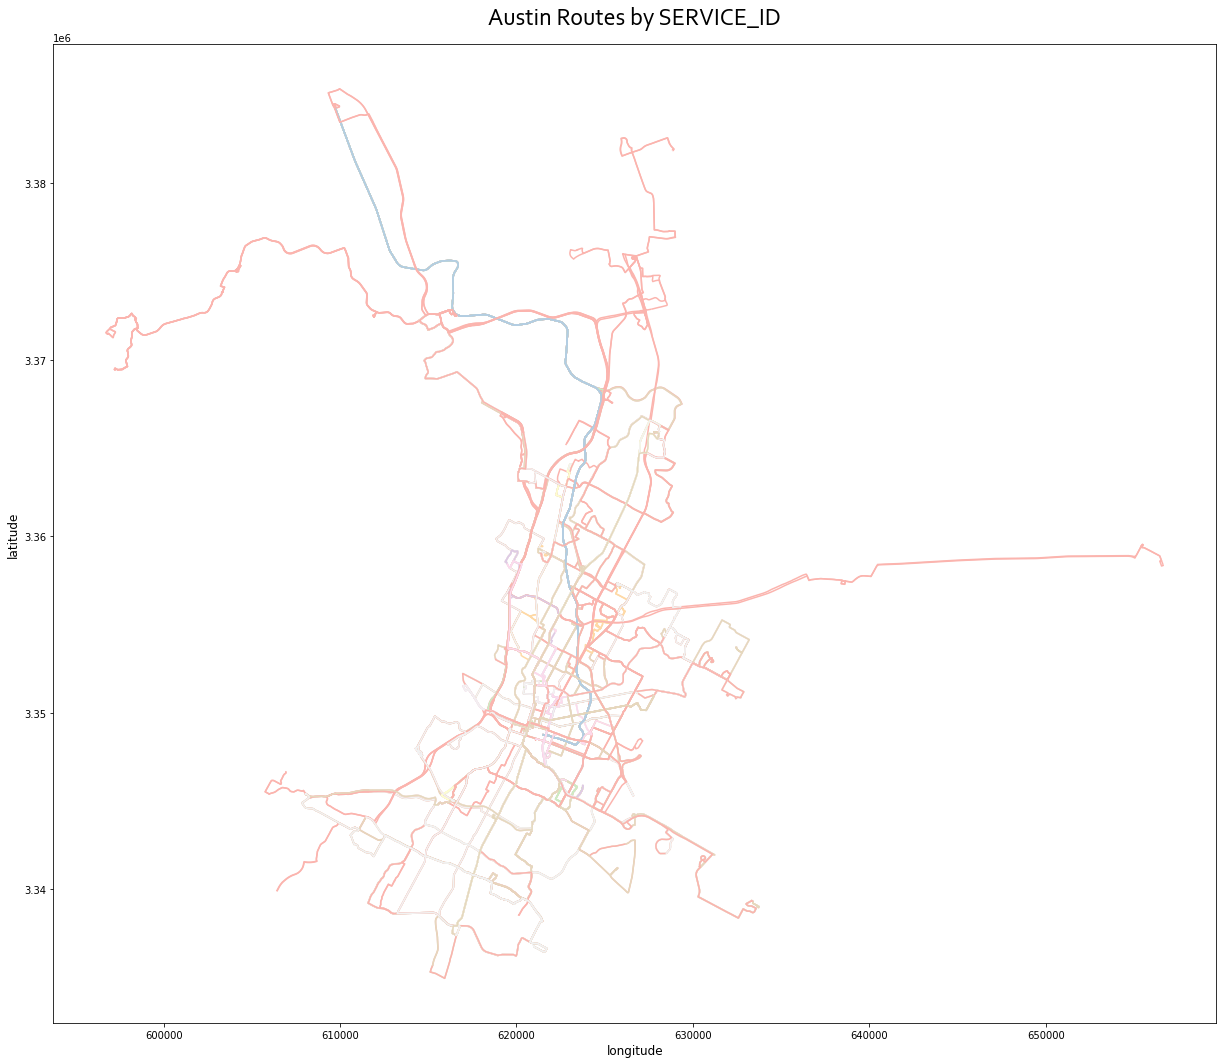

In [3]:
variable = 'SERVICE_ID'
roads.plot(column= variable,figsize=(24, 18), cmap = 'Pastel1', legend=False)
plt.title(f"Austin Routes by {variable}", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=24);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);

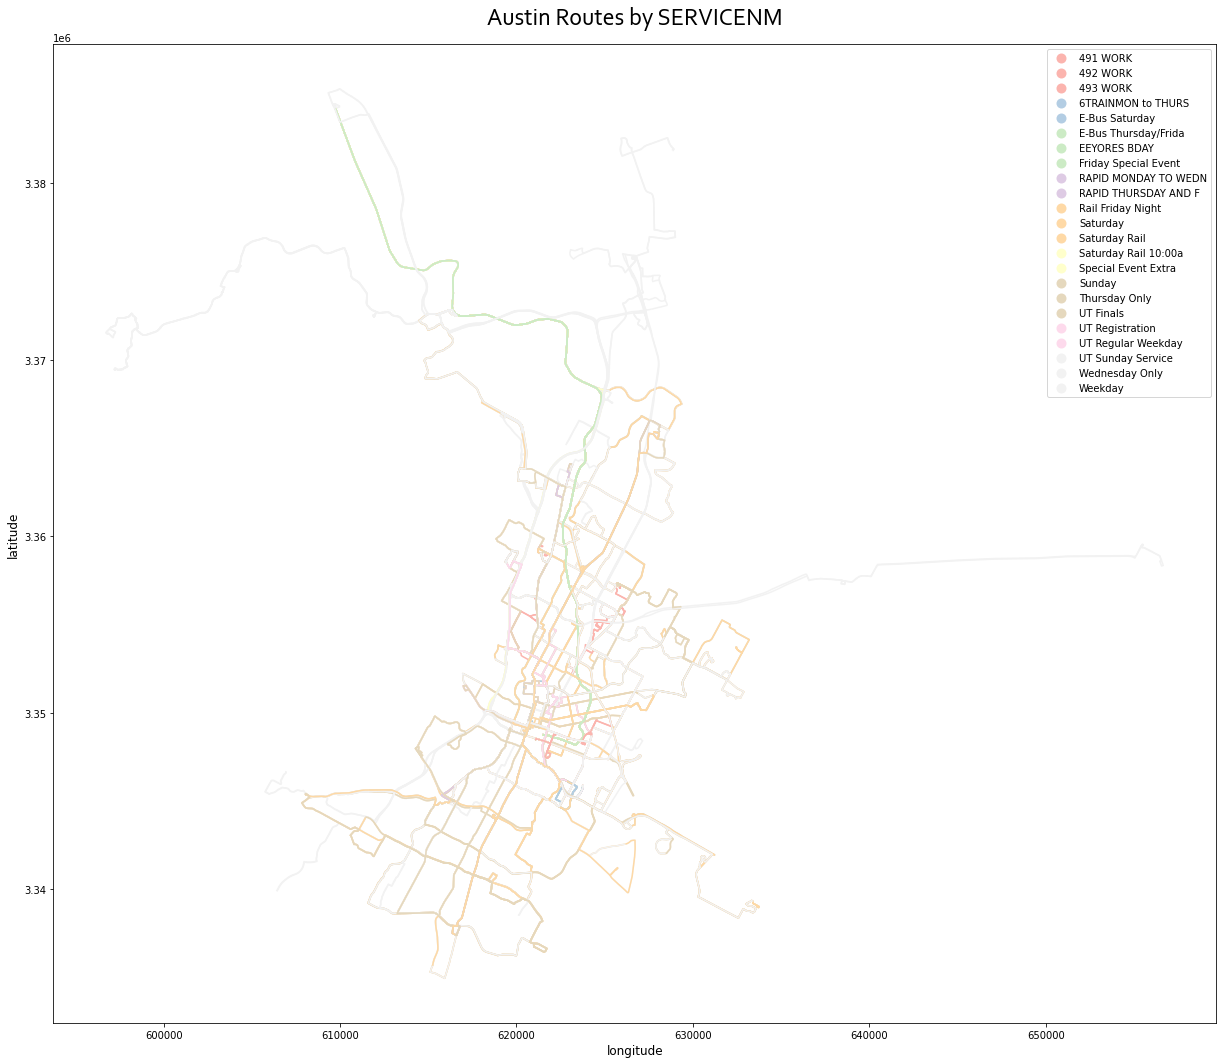

In [4]:
variable = 'SERVICENM'
roads.plot(column= variable,figsize=(24, 18), cmap = 'Pastel1', legend=True)
plt.title(f"Austin Routes by {variable}", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=24);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);

In [5]:
ADA_Polygons_path = "C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\ADA_Polygons.shp"
ADA_Polygons = gpd.read_file(ADA_Polygons_path)
ADA_Polygons.head()

NAME    SQ_MILES     SERVICENM         SOURCE  SOURCEDATE  \
0  None  135.402436  JANUARY 2020  Capital Metro  2020-01-31   
1  None  135.402461  JANUARY 2020  Capital Metro  2020-01-31   
2  None   42.689410  JANUARY 2020  Capital Metro  2020-01-31   
3  None  140.793071  JANUARY 2020  Capital Metro  2020-01-31   
4  None  135.402436  JANUARY 2020  Capital Metro  2020-01-31   

                                            geometry  
0  POLYGON ((617037.308 3373850.418, 617116.731 3...  
1  POLYGON ((617037.308 3373850.418, 617116.731 3...  
2  POLYGON ((625603.674 3360699.854, 625687.698 3...  
3  POLYGON ((617037.308 3373850.418, 617116.731 3...  
4  POLYGON ((617037.308 3373850.418, 617116.731 3...

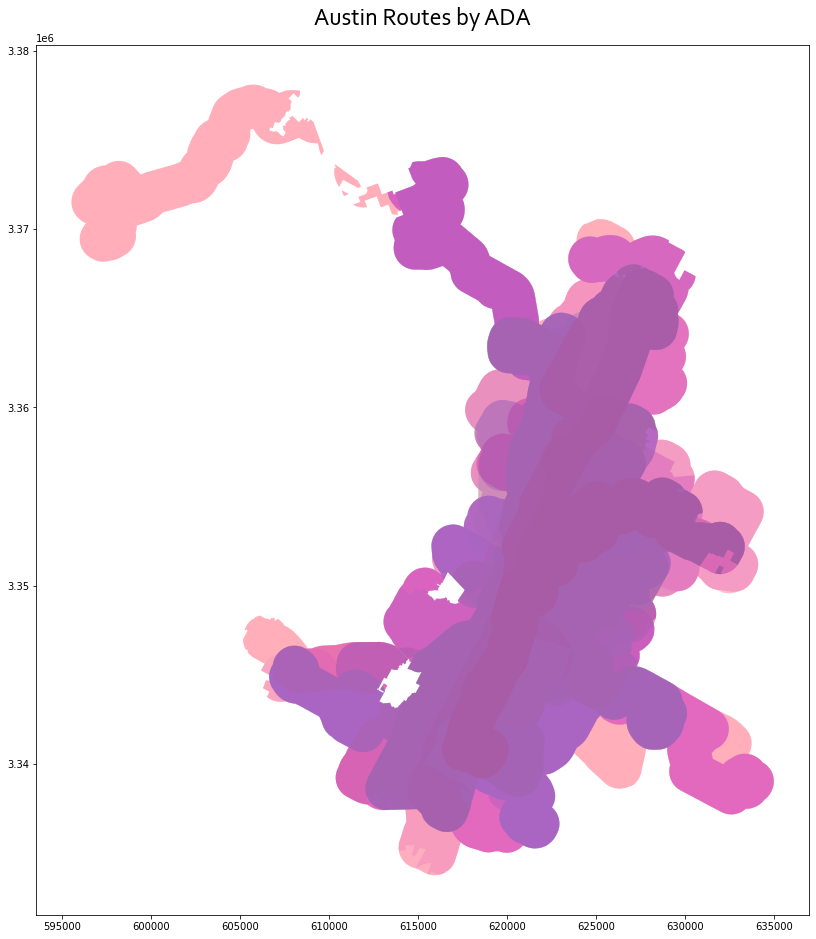

In [6]:
ADA_Polygons=gpd.read_file("C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\ADA_Polygons.shp")
ADA_Polygons.plot(figsize=(18, 16),edgecolor='#ffffff', cmap='hsv', column='SQ_MILES',linewidth=0.2,label= "x",legend=False, alpha=0.05)
plt.title(f"Austin Routes by ADA", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=24);

In [7]:
Service_Area_path = "C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Service_Area.shp"
Service_Area = gpd.read_file(Service_Area_path)
Service_Area.head(2)

NAME     SQ_MILES     SERVICENM         SOURCE  SOURCEDATE  \
0   Jonestown  19622175.77  JANUARY 2020  Capital Metro  2020-01-31   
1  Lago Vista  40310975.95  JANUARY 2020  Capital Metro  2020-01-31   

                                            geometry  
0  POLYGON ((599865.467 3370541.684, 599880.003 3...  
1  MULTIPOLYGON (((597186.875 3365808.666, 597167...

In [8]:
Transit_Hubs_path = "C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Transit_Hubs.shp"
Transit_Hubs = gpd.read_file(Transit_Hubs_path)
Transit_Hubs.head(2)

NAME   ON_STREET        AT_STREET     ADDRESS     CITY  \
0   Pavilion Park & Ride  US HWY 183   Pavilion Blvd.  12400 US H   Austin   
1  Jonestown Park & Ride  Park Drive  Crestview Drive        None  Leander   

  STATE      ZIP       SERVICE         SOURCE  SOURCEDATE  \
0    TX  78759.0  JANUARY 2020  Capital Metro  2020-01-31   
1    TX  78645.0  JANUARY 2020  Capital Metro  2020-01-31   

                         geometry  
0  POINT (619301.672 3366796.351)  
1  POINT (603369.816 3373894.389)

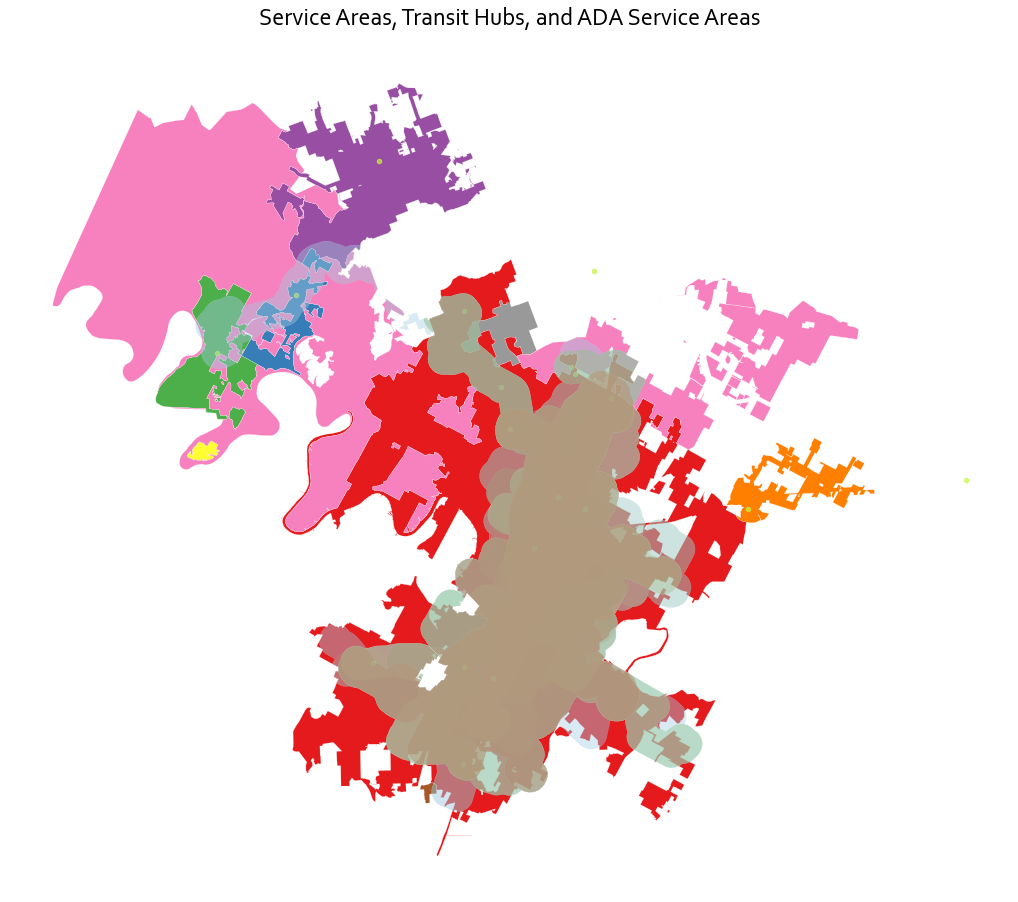

In [9]:
Service_Area = gpd.read_file('C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Service_Area.shp')
Transit_Hubs = gpd.read_file("C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Transit_Hubs.shp")
ADA_Polygons=gpd.read_file("C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\ADA_Polygons.shp")


fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
Service_Area.plot(ax=ax, cmap='Set1', column='NAME', edgecolor='#FFFFFF', linewidth=0.2)
Transit_Hubs.plot(ax=ax, markersize = 20, color='#c5f542', alpha = 0.7)
ADA_Polygons.plot(ax=ax, edgecolor='#ffffff', cmap='Paired_r', column='SQ_MILES',linewidth=0.2,label= "x",legend=False, alpha = 0.08)
ax.set_title("Service Areas, Transit Hubs, and ADA Service Areas", fontdict={"family":"Corbel"}, pad=20, size=24)
plt.savefig('Service_Area_Transit_Hubs.png',transparent=True);

In [10]:
Stops_path = "C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Stops.shp"
Stops = gpd.read_file(Stops_path)
Stops.head(2)

STOP_ID  BENCHES  SHELTERS  BIKERACKS  TRASHCANS              STOP_NAME  \
0      243        1         0          0          1        RIO GRANDE/15TH   
1      466        1         2          0          1  8740 LAMAR/PAYTON GIN   

  STOP_ABBR STREET_NMB ON_STREET   AT_STREET    CITY    ZIP   BAY STOP_TYPE  \
0      RG15     000606      15Th  Rio Grande  Austin  78701  None  Bus Stop   
1     S1801     008740     Lamar  Payton Gin  Austin  78758  None  Bus Stop   

   PLACEMENT     CORNER STATUS   LATITUDE  LONGITUDE         SOURCE  \
0    Farside  Northwest   None  30.278966 -97.746339  Capital Metro   
1  Mid-Block  Southwest   None  30.356809 -97.701066  Capital Metro   

   SOURCEDATE                        geometry  
0  2020-01-31  POINT (620577.879 3350362.856)  
1  2020-01-31  POINT (624833.900 3359038.985)

In [12]:
Stops.shape

(2405, 22)

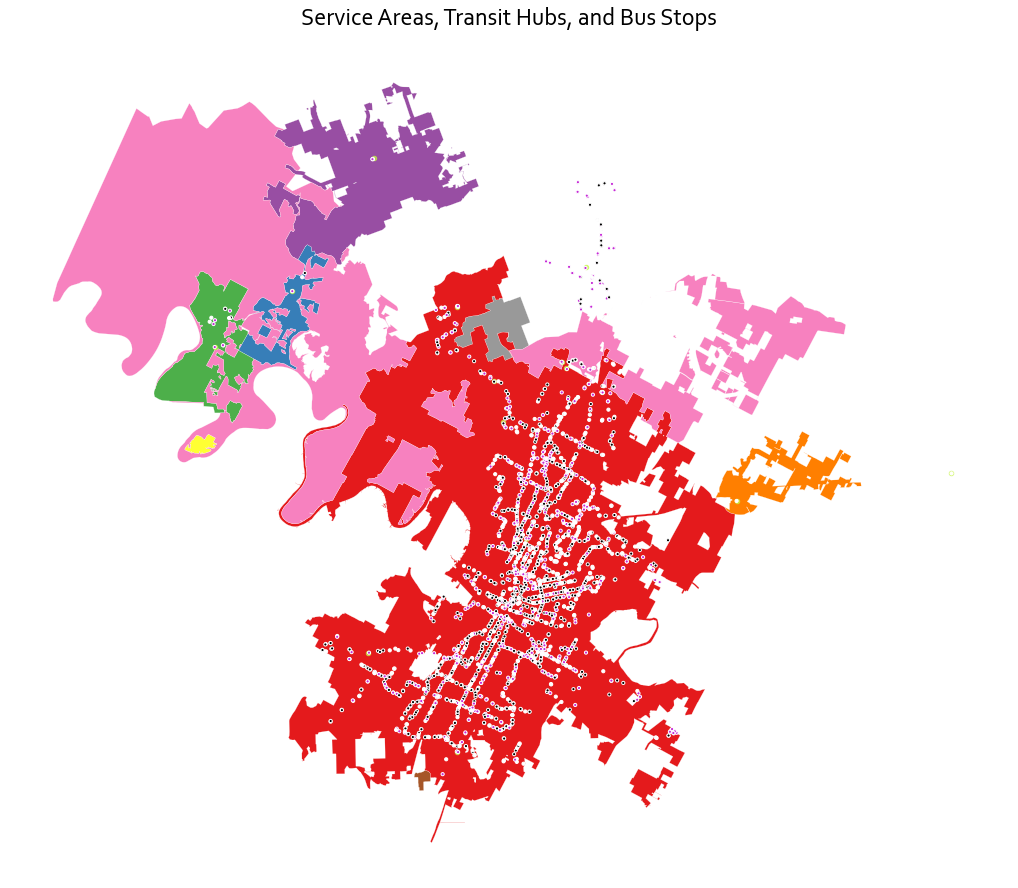

In [13]:
Service_Area = gpd.read_file('C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Service_Area.shp')
Transit_Hubs = gpd.read_file("C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Transit_Hubs.shp")
Stops = gpd.read_file("C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Stops.shp")


fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
Service_Area.plot(ax=ax, cmap='Set1', column='NAME', edgecolor='#FFFFFF', linewidth=0.2)
Transit_Hubs.plot(ax=ax, markersize = 20, color='#c5f542', alpha = 0.7)
Stops.plot(ax=ax, edgecolor='#ffffff', cmap='gnuplot2_r', column='PLACEMENT',s=10,label= "x",legend=False, alpha = 1)
ax.set_title("Service Areas, Transit Hubs, and Bus Stops", fontdict={"family":"Corbel"}, pad=20, size=24)
plt.savefig('Service_Area_Transit_Hubs_and_Bus_Stops.png',transparent=True);

In [15]:
Service_Area_path = "C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Service_Area.shp"
Service_Area = gpd.read_file(Service_Area_path)
Service_Area.head(2)

NAME     SQ_MILES     SERVICENM         SOURCE  SOURCEDATE  \
0   Jonestown  19622175.77  JANUARY 2020  Capital Metro  2020-01-31   
1  Lago Vista  40310975.95  JANUARY 2020  Capital Metro  2020-01-31   

                                            geometry  
0  POLYGON ((599865.467 3370541.684, 599880.003 3...  
1  MULTIPOLYGON (((597186.875 3365808.666, 597167...

In [14]:
Service_Area['NAME'].unique()

array(['Jonestown', 'Lago Vista', 'Manor', 'Point Venture', 'San Leanna',
       'Williamson County', 'Austin', 'Leander', 'Travis County'],
      dtype=object)

In [17]:
Austin = Service_Area[Service_Area['NAME'] == 'Austin']
Austin.shape, Service_Area.shape

((1, 6), (9, 6))

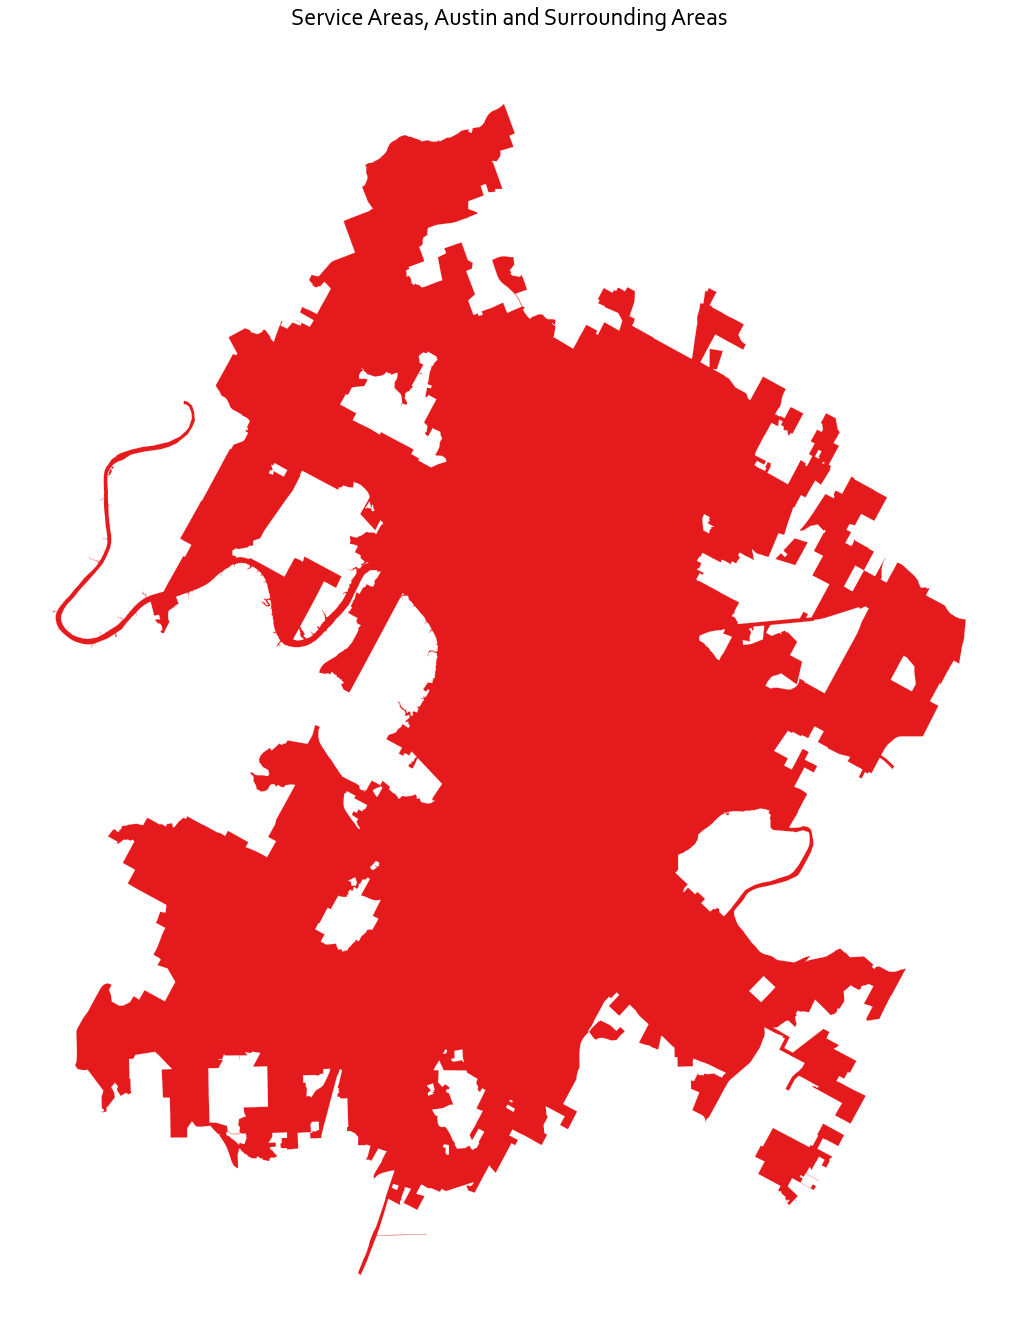

In [18]:
fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
Austin.plot(ax=ax, cmap='Set1', column='NAME', edgecolor='#FFFFFF', linewidth=0.2)
ax.set_title("Service Areas, Austin and Surrounding Areas", fontdict={"family":"Corbel"}, pad=20, size=24)
plt.savefig('Service_Area_Austin_Only.png',transparent=True);

No handles with labels found to put in legend.


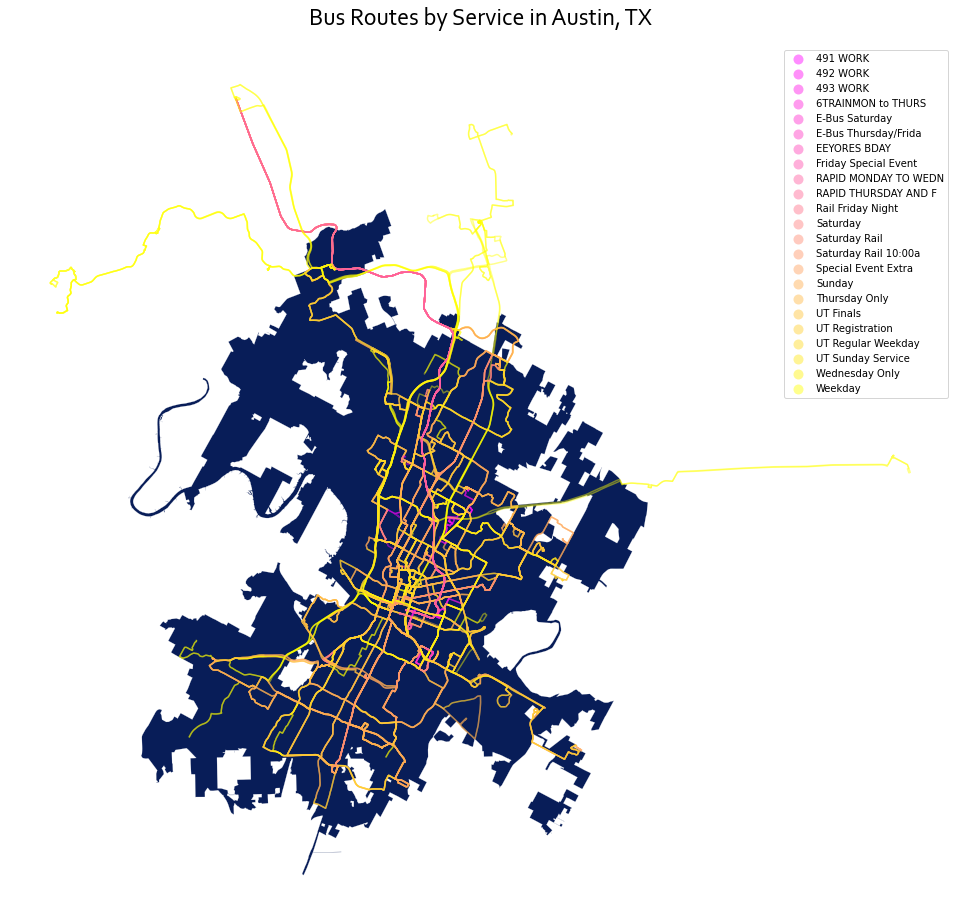

In [19]:
fig, ax = plt.subplots(figsize = (18,16)) 
ax.axis('off')
ax.legend(frameon=False)
Austin.plot(ax=ax, cmap='YlGnBu_r', column='NAME', edgecolor='#FFFFFF', linewidth=0.2)
roads.plot(ax=ax, column=variable, cmap='spring', legend=True, alpha=0.45)
ax.set_title("Bus Routes by Service in Austin, TX", fontdict={"family":"Corbel"}, pad=20, size=24)
plt.savefig('Austin_Plus_Bus_Routes_by_Service.png',transparent=True);

No handles with labels found to put in legend.


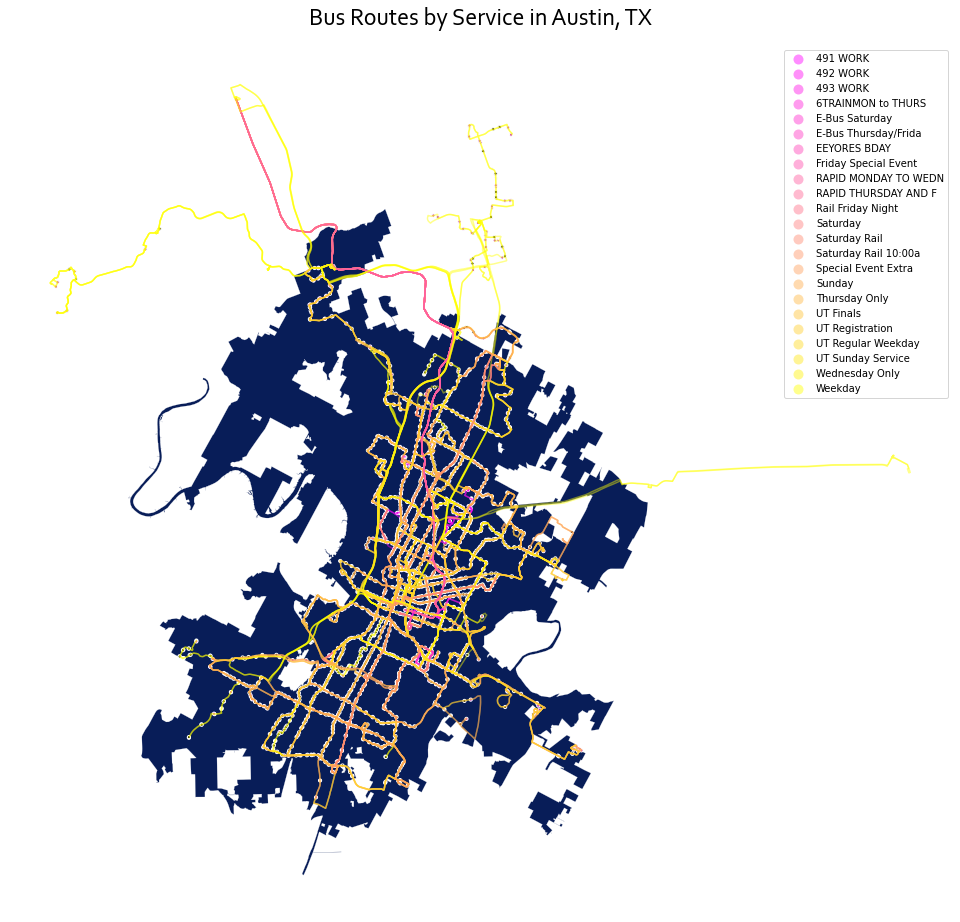

In [20]:
Stops = gpd.read_file("C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Stops.shp")

fig, ax = plt.subplots(figsize = (18,16)) 
ax.axis('off')
ax.legend(frameon=False)
Austin.plot(ax=ax, cmap='YlGnBu_r', column='NAME', edgecolor='#FFFFFF', linewidth=0.2)
roads.plot(ax=ax, column=variable, cmap='spring', legend=True, alpha=0.45)
Stops.plot(ax=ax, edgecolor='#ffffff', cmap='gnuplot2_r', column='PLACEMENT',s=10,label= "x",legend=False, alpha = 1)
ax.set_title("Bus Routes by Service in Austin, TX", fontdict={"family":"Corbel"}, pad=20, size=24)
plt.savefig('Austin_Plus_Bus_Routes_by_Service.png',transparent=True);

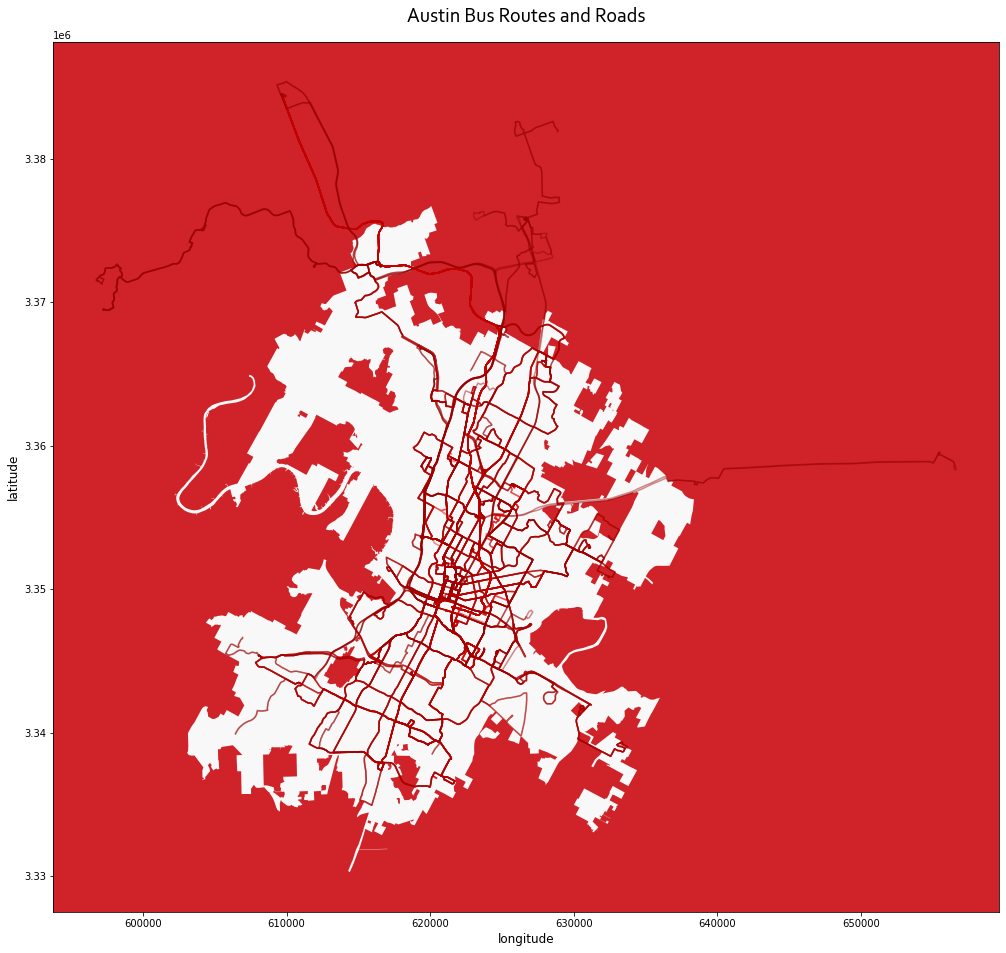

In [21]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
cmap = plt.get_cmap('seismic')
red_cmap = truncate_colormap(cmap, 0.8, 0.95)

cmapb = plt.get_cmap('gist_yarg')
grays = truncate_colormap(cmapb, 0.03, 0.09)
# plt.style.use('dark_background')
fig, ax = plt.subplots(figsize = (18,16)) 
ax.set_facecolor("#cf2329")
Austin.plot(ax=ax, cmap=grays, column='NAME', legend=False, alpha=1,legend_kwds={"frameon": False, "loc":"upper left", "title_fontsize":20, "mode":None,"labelspacing":2,"borderpad":2, "prop":{"family":"Corbel", "size":14}});
roads.plot(ax=ax, column=variable, cmap=red_cmap, legend=False, alpha=0.45)
plt.title("Austin Bus Routes and Roads", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=20);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);

plt.savefig('Routes_and_Bus_Services_Austin_TX.png', dpi=500)
# fig.savefig('Truck_Routes_NYC.svg', format='svg', dpi=300)
# plt.savefig('Truck_Routes_NYC.eps', format='eps')
plt.show()

In [22]:
BuildingPermits_path = "C:\\Users\\lilyx\\DataViz\\Data\\Issued_Building_Permits\\geo_export_be0900ae-2f80-4717-b4e0-49e31fd4db41.shp"
BuildingPermits = gpd.read_file(BuildingPermits_path)
BuildingPermits.head(2)

date_appli    time_appli  building_v  building_2 calendar_y certificat  \
0  2016-08-24  00:00:00.000         NaN         NaN       2017        Yes   
1  2018-04-11  00:00:00.000         NaN         NaN       2018         No   

     city condominiu council_di  county created_by  date_creat    time_creat  \
0  AUSTIN         No          4  TRAVIS    DSD GIS  2021-01-28  09:28:33.000   
1  AUSTIN         No          6  TRAVIS    DSD GIS  2021-01-28  09:27:45.000   

  day_issued  electrical  electric_2  date_expir    time_expir  date_final  \
0     FRIDAY         NaN         NaN  2018-06-28  00:00:00.000  2018-06-28   
1     FRIDAY         NaN         NaN  2018-08-27  00:00:00.000  2018-08-27   

     time_final fiscal_yea   folderrsn foldertype geocode_ty  date_issue  \
0  00:00:00.000       2017  11693569.0         BP       None  2017-08-11   
1  00:00:00.000       2018  11938057.0         BP       None  2018-05-04   

     time_issue     issue_meth  issued_bui issued_in_           jurisdicti  \
0  00:00:00.000  Permit Center     36763.0         No  AUSTIN FULL PURPOSE   
1  00:00:00.000  Permit Center     27206.0         No           AUSTIN LTD   

    latitude                                         legal_desc  \
0  30.329722                              LOT 2 HARRISDALE SUBD   
1  30.336554  LOT 26 BLK C MCCORMICK RANCH ON LAKE AUSTIN PHS 2   

                                                link  \
0  https://abc.austintexas.gov/web/permit/public-...   
1  https://abc.austintexas.gov/web/permit/public-...   

                          location  longitude  mechanical  mechanic_2  \
0  POINT(-97.71708662 30.32972212) -97.717087         NaN         NaN   
1  POINT(-97.91797274 30.33655429) -97.917973         NaN         NaN   

  medgas_val  medgas_v_2 modified_b date_modif time_modif  number_of_  \
0       None         NaN       None       None       None         2.0   
1       None         NaN       None       None       None         1.0   

   number_o_2  objectid               permit_loc      permit_num  \
0         2.0   36764.0    6405 CHESTERFIELD AVE  2017-034077 BP   
1         1.0   27207.0  12616 EVENING STAR PASS  2018-079871 BP   

        permit_typ  plumbing_v  plumbing_2      propx       propy  remodel_re  \
0  Building Permit         NaN         NaN  3121903.0  10093361.0         NaN   
1  Building Permit         NaN         NaN  3058488.0  10094412.0         NaN   

  state status street_dir    street_nam street_num street_pre street_typ  \
0    TX  Final       None  CHESTERFIELD       6405       None        AVE   
1    TX  Final       None  EVENING STAR      12616       None       PASS   

                                sub_type     tcad_id  total_exis  total_job_  \
0                R- 103 Two Family Bldgs  0229110426         NaN    500000.0   
1  R- 329 Res Structures Other Than Bldg  0131550905         NaN     90000.0   

   total_lot_  total_new_  total_valu  unit unit_type  \
0      9939.0      3753.0         NaN  None      None   
1     13808.0       624.0         NaN  None      None   

                                          work_descr work_type zip_code  \
0            new 6 bedroom 6 bathroom 2 story duplex       New    78752   
1  New 582 sqft inground swimming pool 42 sqft sp...       New    78732   

                     geometry  
0  POINT (-97.71709 30.32973)  
1  POINT (-97.91798 30.33656)

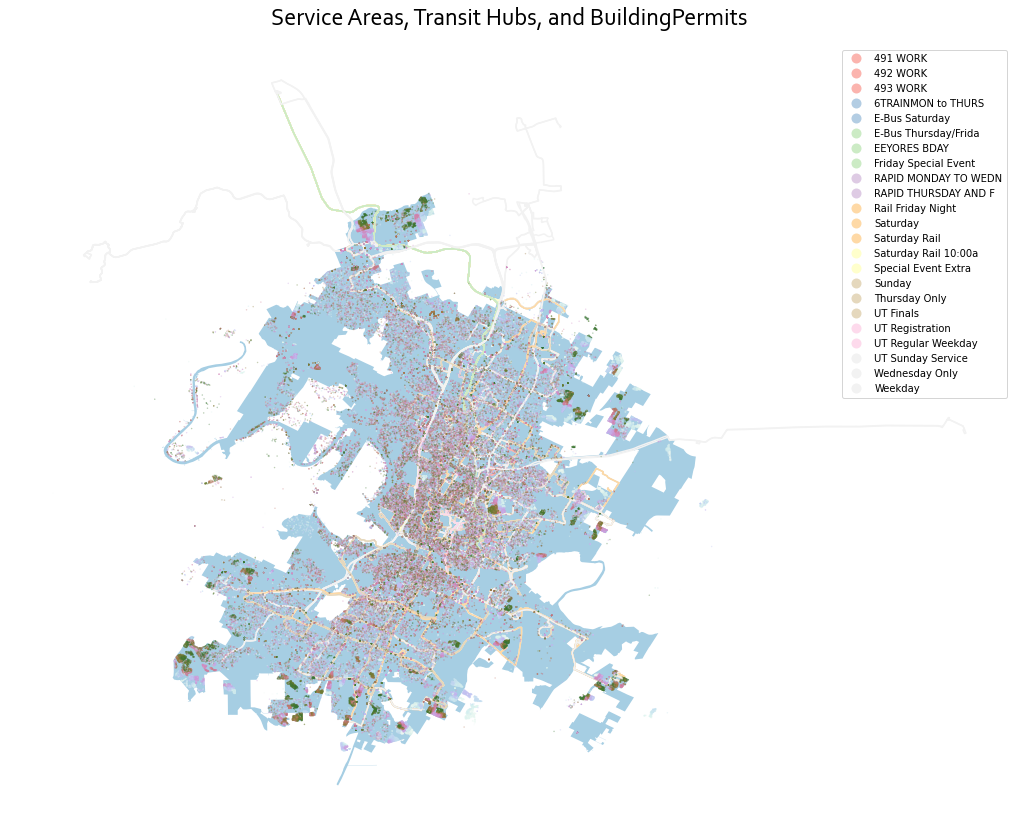

In [38]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cubehelix_frac = plt.get_cmap('cubehelix_r')
cubehelix_fracs = truncate_colormap(cubehelix_frac, 0.7, 0.01)


BuildingPermits = gpd.read_file("C:\\Users\\lilyx\\DataViz\\Data\\Issued_Building_Permits\\geo_export_be0900ae-2f80-4717-b4e0-49e31fd4db41.shp")
# BuildingPermits = BuildingPermits.head(2000)
BuildingPermits = BuildingPermits.to_crs({'init': 'epsg:4326'})
roads = roads.to_crs({'init': 'epsg:4326'})
Austin = Austin.to_crs({'init': 'epsg:4326'})

fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
Austin.plot(ax=ax, cmap='Paired', column='NAME', legend=False, alpha=1, zorder=1, legend_kwds={"frameon": False, "loc":"upper left", "title_fontsize":20, "mode":None,"labelspacing":2,"borderpad":2, "prop":{"family":"Corbel", "size":14}});
roads.plot(ax=ax, column= variable, cmap = 'Pastel1', legend=True, zorder=2)
BuildingPermits.plot(ax=ax, cmap=cubehelix_fracs, column='date_appli',s=0.2,label= "x",legend=False, alpha = 0.4, zorder=3)
ax.set_title("Service Areas, Transit Hubs, and BuildingPermits", fontdict={"family":"Corbel"}, pad=20, size=24)
plt.savefig('Service_Area_Transit_Hubs_and_BuildingPermits.png',transparent=True, dpi=500);

In [33]:
Austin_Surrounding_ZipCodes_path = "C:\\Users\\lilyx\\DataViz\\Data\\austin_area_zip_codes\\austin_area_zip_codes.shp"
Austin_Surrounding_ZipCodes = gpd.read_file(Austin_Surrounding_ZipCodes_path)
Austin_Surrounding_ZipCodes.head(1)

geodb_oid  objectid  zipcodes_i zipcode    name created_by created_da  \
0        3.0       3.0        56.0   78739  AUSTIN       None       None   

  modified_b modified_d    shape_area     shape_len  cartodb_id  created_at  \
0       None       None  3.383405e+08  97785.793334           3  2015-06-07   

   updated_at                                           geometry  
0  2015-06-07  POLYGON ((-97.89002 30.20941, -97.88929 30.208...

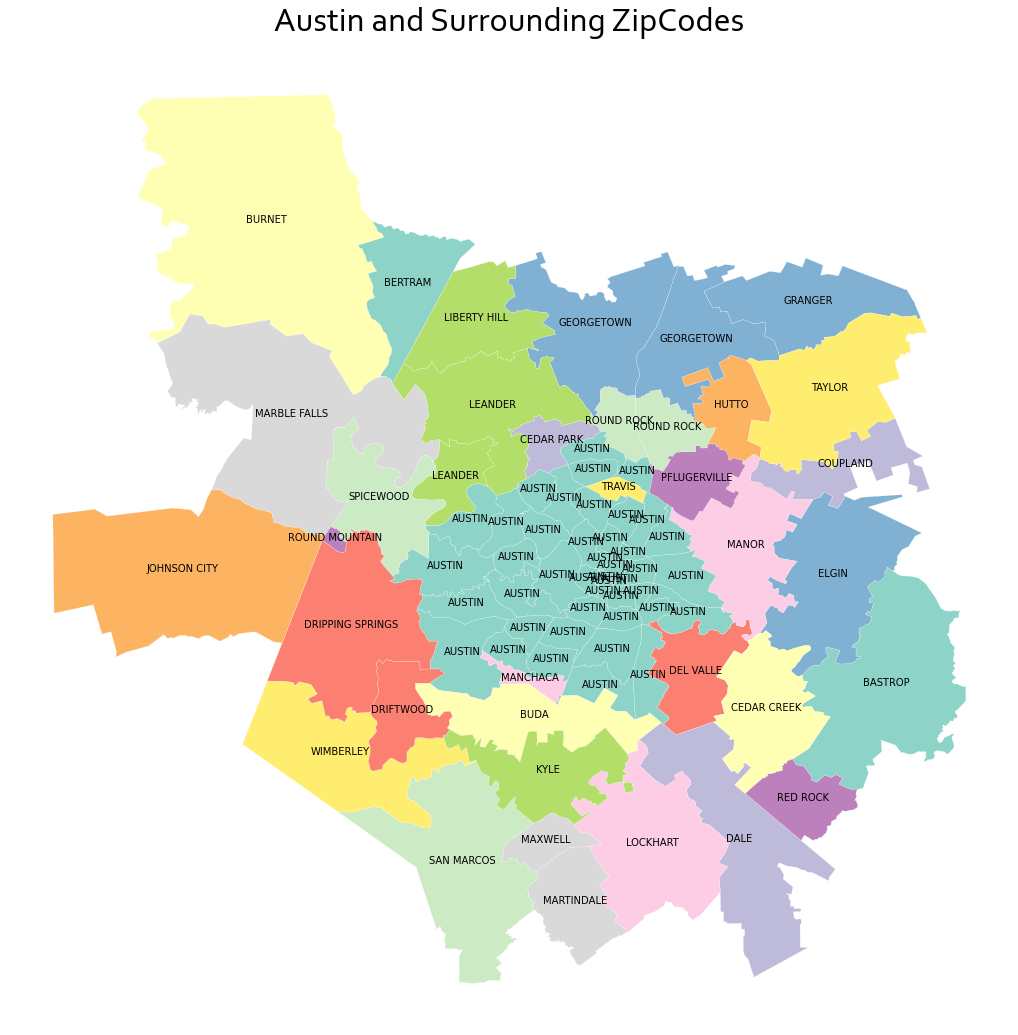

In [35]:
fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
ax = Austin_Surrounding_ZipCodes.plot(ax=ax, cmap='Set3', column='name', edgecolor='#FFFFFF', linewidth=0.2)

Austin_Surrounding_ZipCodes.apply(lambda x: ax.annotate(s=x['name'], xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

ax.set_title("Austin and Surrounding ZipCodes", fontdict={"family":"Corbel"}, pad=20, size=34)
plt.savefig('Austin_and_Surrounding_ZipCodes',transparent=True);

In [26]:
Austin_ZipCodes = Austin_Surrounding_ZipCodes[Austin_Surrounding_ZipCodes['name'] == 'AUSTIN']
Austin_ZipCodes.head(2)

geodb_oid  objectid  zipcodes_i zipcode    name created_by created_da  \
0        3.0       3.0        56.0   78739  AUSTIN       None       None   
5       33.0      33.0        27.0   78712  AUSTIN       None       None   

  modified_b modified_d    shape_area     shape_len  cartodb_id  created_at  \
0       None       None  3.383405e+08  97785.793334           3  2015-06-07   
5       None       None  8.086007e+06  17888.334825          26  2015-06-07   

   updated_at                                           geometry  
0  2015-06-07  POLYGON ((-97.89002 30.20941, -97.88929 30.208...  
5  2015-06-07  POLYGON ((-97.73366 30.28536, -97.73295 30.285...

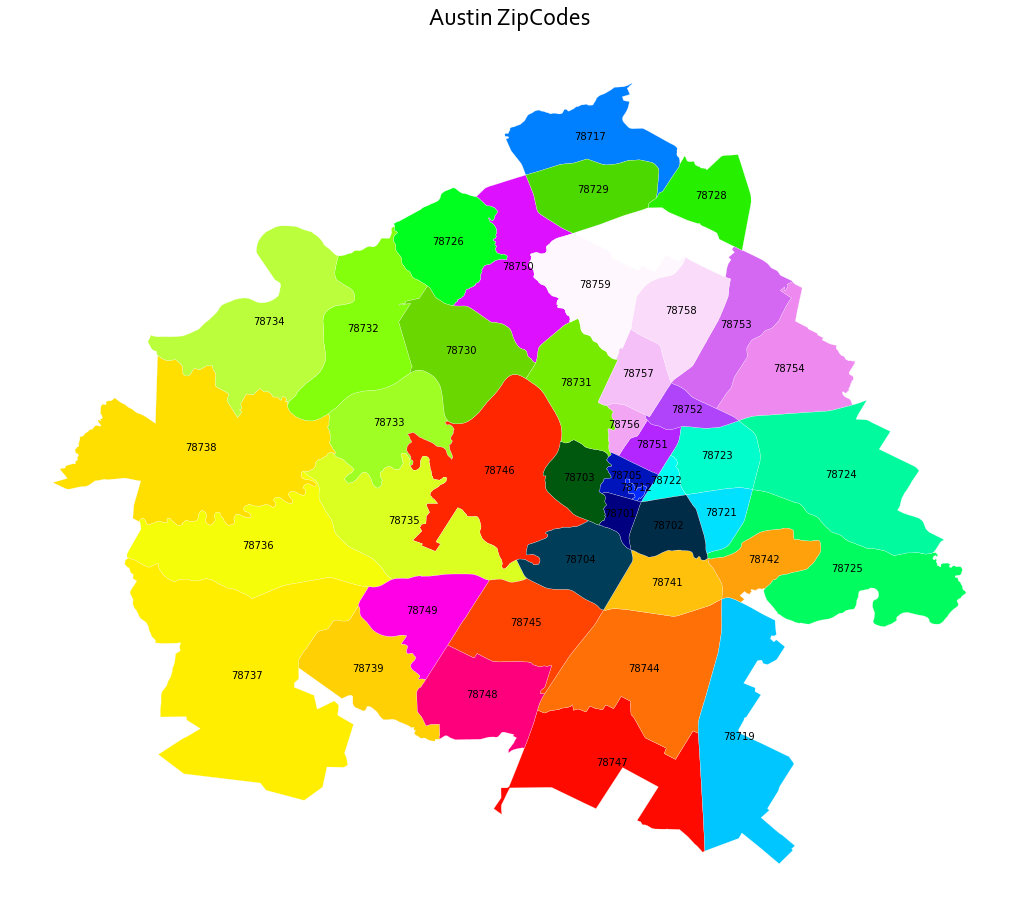

In [28]:
fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
ax = Austin_ZipCodes.plot(ax=ax, cmap='gist_ncar', column='zipcode', edgecolor='#FFFFFF', linewidth=0.2)

Austin_ZipCodes.apply(lambda x: ax.annotate(s=x.zipcode, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

ax.set_title("Austin ZipCodes", fontdict={"family":"Corbel"}, pad=20, size=24)
plt.savefig('Austin_ZipCodes',transparent=True);

In [38]:
Austin_Surrounding_ZipCodes_Austin_Merged = Austin_Surrounding_ZipCodes.dissolve(by='name')
Austin_Surrounding_ZipCodes_Austin_Merged.reset_index(inplace=True)
Austin_Surrounding_ZipCodes_Austin_Merged.head(1)

name                                           geometry  geodb_oid  \
0  AUSTIN  POLYGON ((-97.67219 30.22015, -97.67212 30.220...        3.0   

   objectid  zipcodes_i zipcode created_by created_da modified_b modified_d  \
0       3.0        56.0   78739       None       None       None       None   

     shape_area     shape_len  cartodb_id  created_at  updated_at  
0  3.383405e+08  97785.793334           3  2015-06-07  2015-06-07

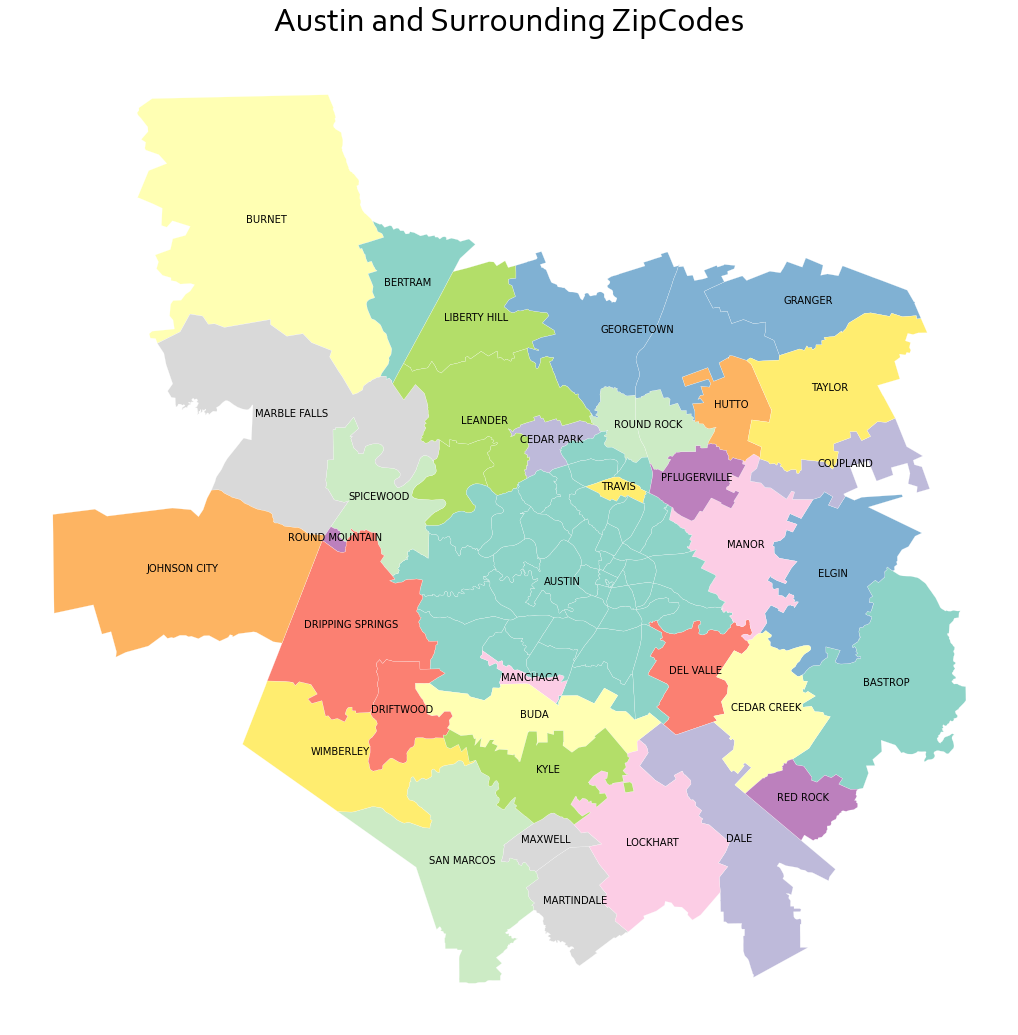

In [39]:
fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
ax = Austin_Surrounding_ZipCodes.plot(ax=ax, cmap='Set3', column='name', edgecolor='#FFFFFF', linewidth=0.2)

Austin_Surrounding_ZipCodes_Austin_Merged.apply(lambda x: ax.annotate(s=x['name'], xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

ax.set_title("Austin and Surrounding ZipCodes", fontdict={"family":"Corbel"}, pad=20, size=34)
plt.savefig('Austin_and_Surrounding_ZipCodes',transparent=True);

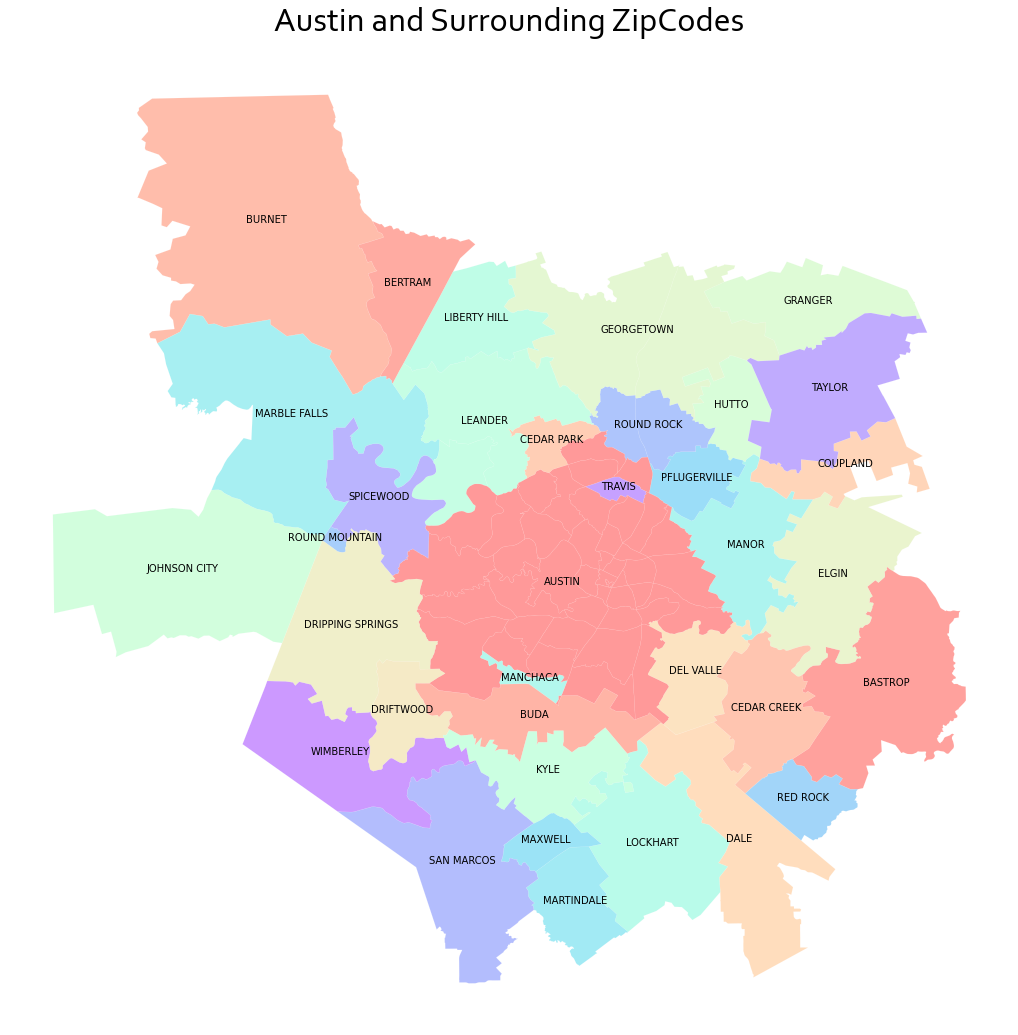

In [45]:
fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
ax = Austin_Surrounding_ZipCodes.plot(ax=ax, cmap='rainbow_r', column='name', edgecolor='#FFFFFF', linewidth=0.2, alpha = 0.4)

Austin_Surrounding_ZipCodes_Austin_Merged.apply(lambda x: ax.annotate(s=x['name'], xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

ax.set_title("Austin and Surrounding ZipCodes", fontdict={"family":"Corbel"}, pad=20, size=34)
plt.savefig('Austin_and_Surrounding_ZipCodes',transparent=True);

In [46]:
Austin_Creeks_by_Type_path = "C:\\Users\\lilyx\\DataViz\\Data\\Austin_Creeks_by_Type\\geo_export_a30c2cfd-231a-4475-bf02-e604eeb791a8.shp"
Austin_Creeks_by_Type = gpd.read_file(Austin_Creeks_by_Type_path)
Austin_Creeks_by_Type.head(1)

comments created_by  date_creat    time_creat  creek_id  drainage_a  \
0     None  MWASHBURN  2014-07-01  14:56:35.000   22131.0        64.0   

   enabled  feature_co modified_b  date_modif    time_modif  objectid  \
0      1.0        72.0  MWASHBURN  2014-07-01  14:58:25.000   29764.0   

  siteplan_n source stream_nam watershed_  \
0       None   2013       None        BER   

                                            geometry  
0  LINESTRING (-97.96943 30.17254, -97.96931 30.1...

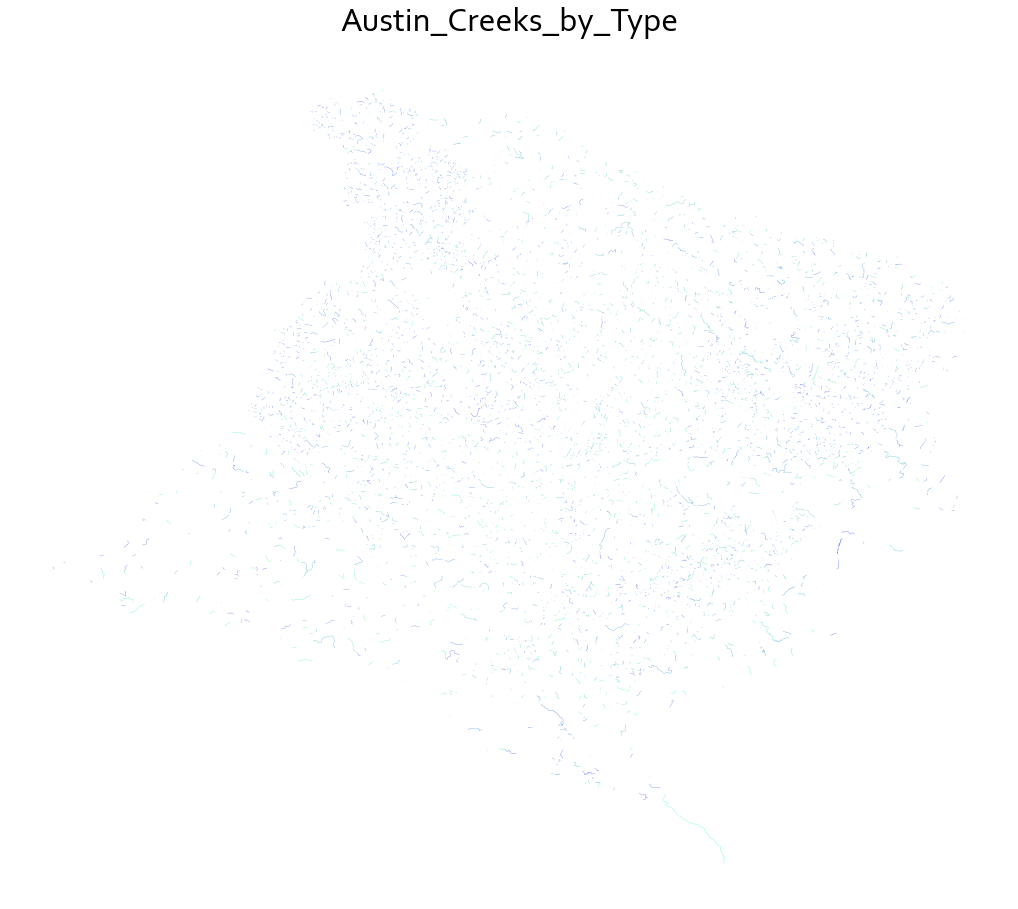

In [53]:
Austin_Creeks_by_Type = Austin_Creeks_by_Type.head(10000)
fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
ax = Austin_Creeks_by_Type.plot(ax=ax, cmap='winter', column='creek_id', edgecolor='#FFFFFF', linewidth=0.2, alpha = 1)

# Austin_Creeks_by_Type.replace({'stream_nam':'None'}, '')
# Austin_Creeks_by_Type.apply(lambda x: ax.annotate(s=x['stream_nam'], xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

ax.set_title("Austin_Creeks_by_Type", fontdict={"family":"Corbel"}, pad=20, size=34)
plt.savefig('Austin_Creeks_by_Type',transparent=True);

In [54]:
Austin_Lakes_Rivers = "C:\\Users\\lilyx\\DataViz\\Data\\Austin_Lakes_Rivers\\geo_export_1c57548f-660a-4792-8a83-49028c25e4c1.shp"
Austin_Lakes_Rivers = gpd.read_file(Austin_Lakes_Rivers)
Austin_Lakes_Rivers.head(1)

created_by date_creat time_creat  feature_co  lakes_id  max_depth  \
0       None       None       None       122.0       2.0       75.0   

  modified_b date_modif time_modif         name  objectid  reg_elevat  \
0       None       None       None  Lake Austin     325.0       492.8   

     shape_area     shape_leng source  surface_ar  \
0  7.148218e+07  347763.575694   2012      1642.0   

                                            geometry  
0  POLYGON ((-97.77980 30.30827, -97.77974 30.308...

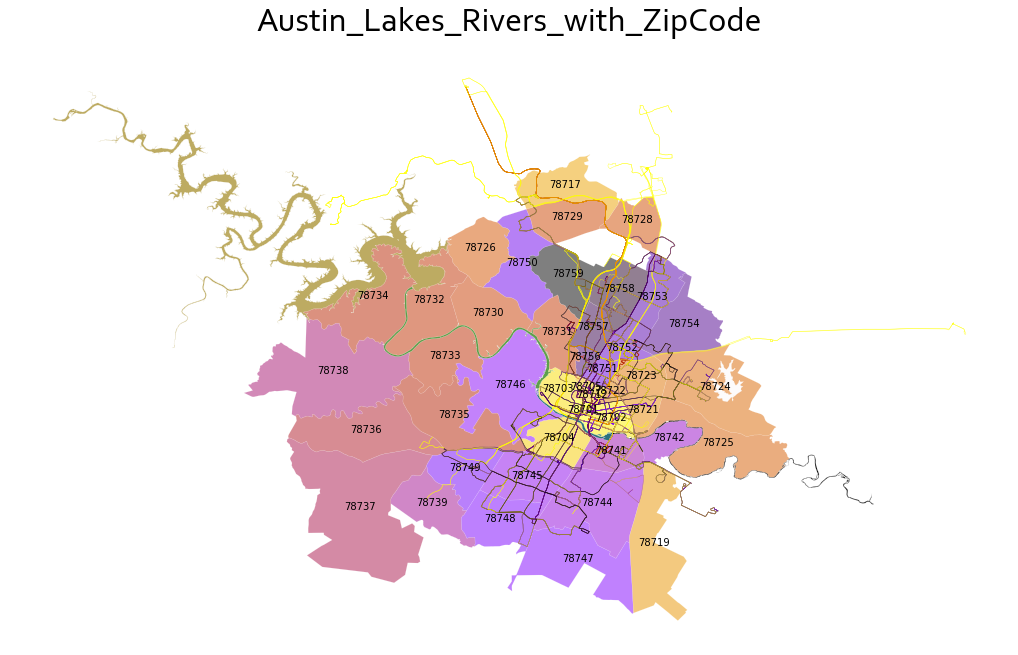

In [74]:
fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')

ax = roads.plot(ax=ax, column='SERVICE_ID', cmap = 'gnuplot_r', zorder=3, alpha = 0.7, linewidth=0.5)
ax = Austin_ZipCodes.plot(ax=ax, cmap='gnuplot_r', column='zipcode', edgecolor='#FFFFFF', linewidth=0.2, alpha = 0.5, zorder=1)
ax = Austin_Lakes_Rivers.plot(ax=ax, cmap='gist_earth', column='name', edgecolor='#FFFFFF', linewidth=0.2, alpha = 1, zorder=2)

roads = roads.to_crs({'init': 'epsg:4326'})
Austin_ZipCodes = Austin_ZipCodes.to_crs({'init': 'epsg:4326'})
Austin_Lakes_Rivers = Austin_Lakes_Rivers.to_crs({'init': 'epsg:4326'})

# Austin_Lakes_Rivers.apply(lambda x: ax.annotate(s=x['name'], xy=x.geometry.centroid.coords[0], ha='center'),axis=1);
Austin_ZipCodes.apply(lambda x: ax.annotate(s=x.zipcode, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

ax.set_title("Austin_Lakes_Rivers_with_ZipCode", fontdict={"family":"Corbel"}, pad=20, size=34)
plt.savefig('Austin_Lakes_Rivers_with_ZipCode',transparent=True);

In [75]:
Austin_LotLine_path = "C:\\Users\\lilyx\\DataViz\\Data\\Austin_LotLine\\geo_export_a288f660-3443-46a7-bb1f-5f474be4809d.shp"
Austin_LotLine = gpd.read_file(Austin_LotLine_path)
Austin_LotLine.head(1)

block_id created_by  date_creat    time_creat  land_base_ land_bas_2 lot_id  \
0        D        n/a  2007-09-21  00:00:00.000   1745202.0        LOT     13   

  modified_b date_modif time_modif  objectid    shape_area  shape_leng  \
0       None       None       None     832.0  12728.255859  456.226553   

                                            geometry  
0  POLYGON ((-97.79091 30.14220, -97.79101 30.142...

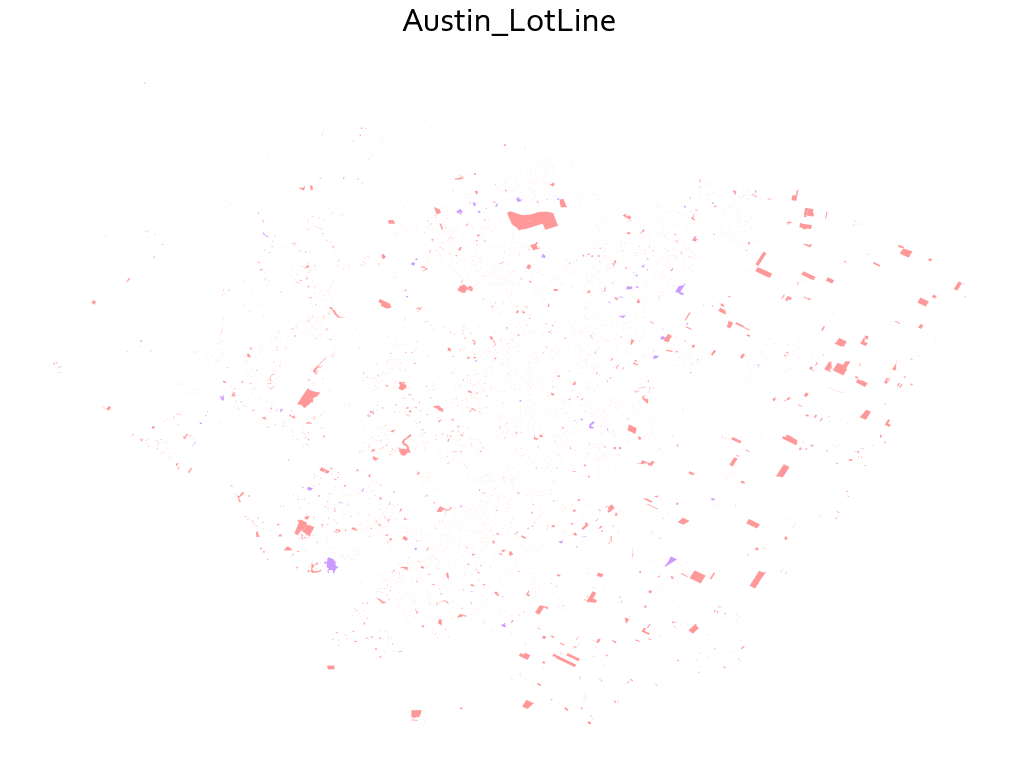

In [79]:
Austin_LotLine = Austin_LotLine.head(500000)
fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
ax = Austin_LotLine.plot(ax=ax, cmap='rainbow_r', column='land_base_', edgecolor='#FFFFFF', linewidth=0.2, alpha = 0.4)
ax.set_title("Austin_LotLine", fontdict={"family":"Corbel"}, pad=20, size=34)
plt.savefig('Austin_LotLine',transparent=True);

In [80]:
Austin_Police_Department_Districts = "C:\\Users\\lilyx\\DataViz\\Data\\Austin_Police_Department_Districts\\geo_export_315dc3f8-a193-43a1-9783-758bb47bf859.shp"
Austin_Police_Department_Districts = gpd.read_file(Austin_Police_Department_Districts)
Austin_Police_Department_Districts.head(1)

battalion_  battalio_2 bureau_nam  code       color    command_ph  \
0       CHAR       400.0    CENTRAL  1279  16744576.0  512-974-5900   

  district_n external_k       input_by  date_input    time_input  jurisdicti  \
0  CHARLIE 2       1279  bmartinlimuel  2014-12-22  11:31:16.000        11.0   

  modified_b  date_modif    time_modif  objectid   patrol_are  primary_ke  \
0  APD_ADMIN  2019-09-18  11:54:30.000      88.0  CENTRALEAST         4.0   

  sector_nam    shape_area    shape_leng  sort_order  \
0    CHARLIE  6.274782e+07  38265.126972         1.0   

                                            geometry  
0  POLYGON ((-97.69791 30.27356, -97.69679 30.269...

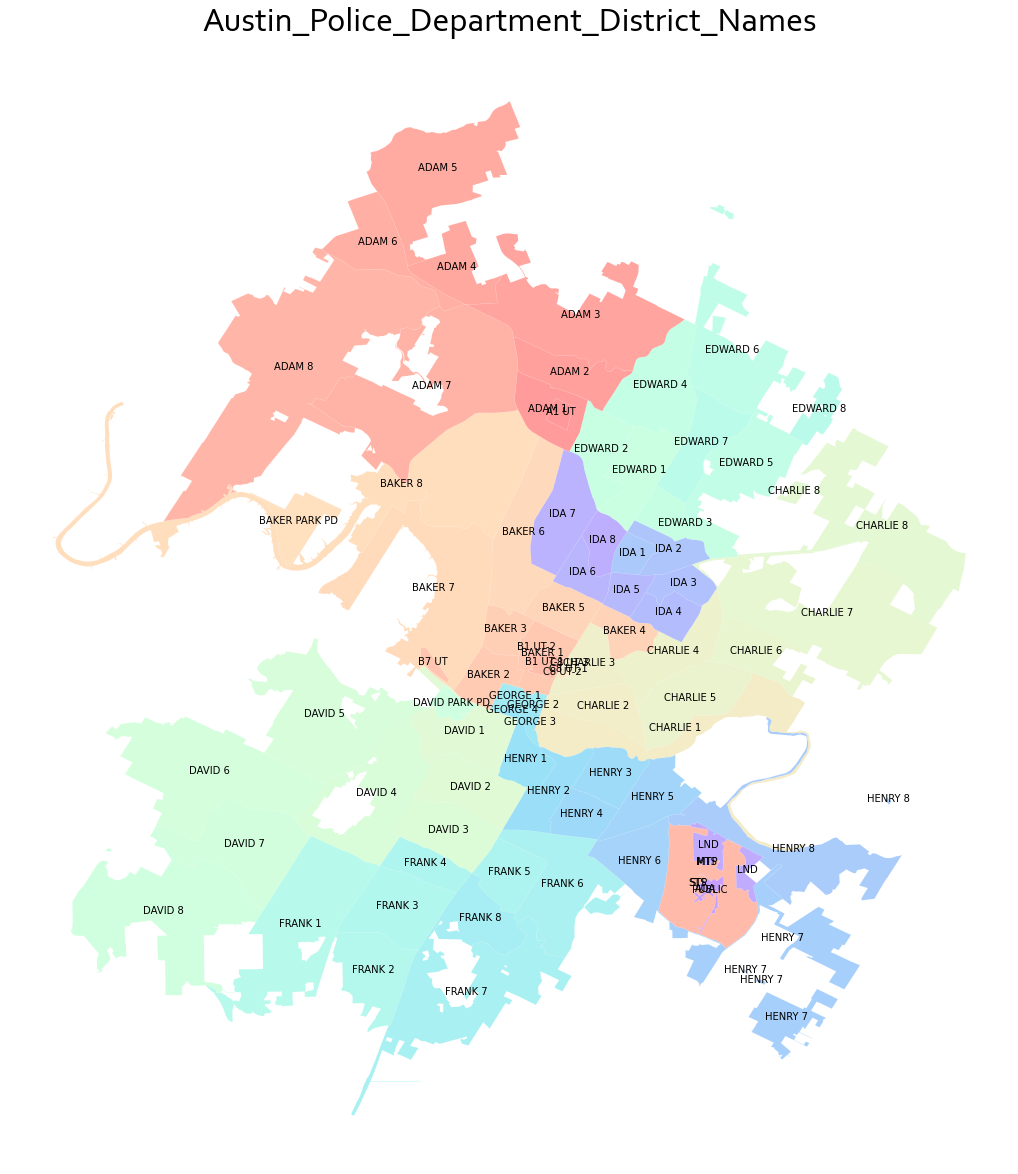

In [84]:
fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
ax = Austin_Police_Department_Districts.plot(ax=ax, cmap='rainbow_r', column='district_n', edgecolor='#FFFFFF', linewidth=0.2, alpha = 0.4)
Austin_Police_Department_Districts.apply(lambda x: ax.annotate(s=x.district_n, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);
ax.set_title("Austin_Police_Department_District_Names", fontdict={"family":"Corbel"}, pad=20, size=34)
plt.savefig('Austin_Police_Department_Districts',transparent=True);

In [85]:
Austin_Watershed_Boundary_Low_Flow = "C:\\Users\\lilyx\\DataViz\\Data\\Austin_Watershed_Boundary_Low_Flow\\geo_export_13f231a6-2c31-4ade-84e7-34ea62efbb56.shp"
Austin_Watershed_Boundary_Low_Flow = gpd.read_file(Austin_Watershed_Boundary_Low_Flow)
Austin_Watershed_Boundary_Low_Flow.head(1)

created_by      created_da display_na modified_b modified_d  objectid  \
0  EWADSWORTH  20130411152649      Eanes       None       None       1.0   

                          receiving_      receivin_2    shape_area  \
0  Colorado River below Longhorn Dam  Lady Bird Lake  1.047820e+08   

     shape_leng watershed_   watershe_2  watershe_3  \
0  70822.669216        EAN  Eanes Creek        24.0   

                                            geometry  
0  POLYGON ((-97.82878 30.29905, -97.82882 30.298...

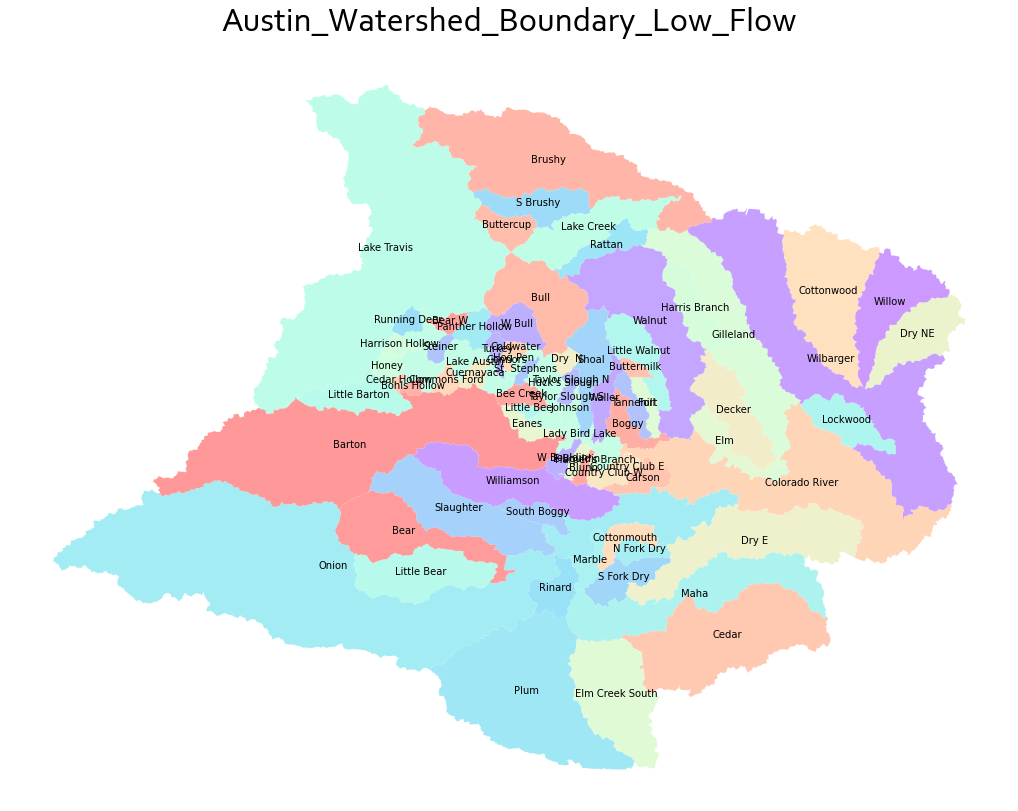

In [86]:
fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
ax = Austin_Watershed_Boundary_Low_Flow.plot(ax=ax, cmap='rainbow_r', column='display_na', edgecolor='#FFFFFF', linewidth=0.2, alpha = 0.4)
Austin_Watershed_Boundary_Low_Flow.apply(lambda x: ax.annotate(s=x.display_na, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);
ax.set_title("Austin_Watershed_Boundary_Low_Flow", fontdict={"family":"Corbel"}, pad=20, size=34)
plt.savefig('Austin_Watershed_Boundary_Low_Flow',transparent=True);

In [87]:
Austin_ZoningOrdinance = "C:\\Users\\lilyx\\DataViz\\Data\\Austin_ZoningOrdinance\\geo_export_76117dc3-4fe7-4822-852a-893f05edd705.shp"
Austin_ZoningOrdinance = gpd.read_file(Austin_ZoningOrdinance)
Austin_ZoningOrdinance.head(1)

case_numbe created_by  date_creat    time_creat  folderrsn modified_b  \
0  C14-04-0004.001         SM  2004-08-06  00:00:00.000   233956.0    castrot   

   date_modif    time_modif  objectid    shape_area  shape_leng  zoning_ord  \
0  2010-05-03  00:00:00.000    5945.0  70911.220703  1389.26381      2308.0   

   zoning_o_2                                         zoning_o_3 zoning_o_4  \
0  040401-32A  http://www.cityofaustin.org/edims/document.cfm...      CS-NP   

                                            geometry  
0  POLYGON ((-97.72731 30.36740, -97.72767 30.366...

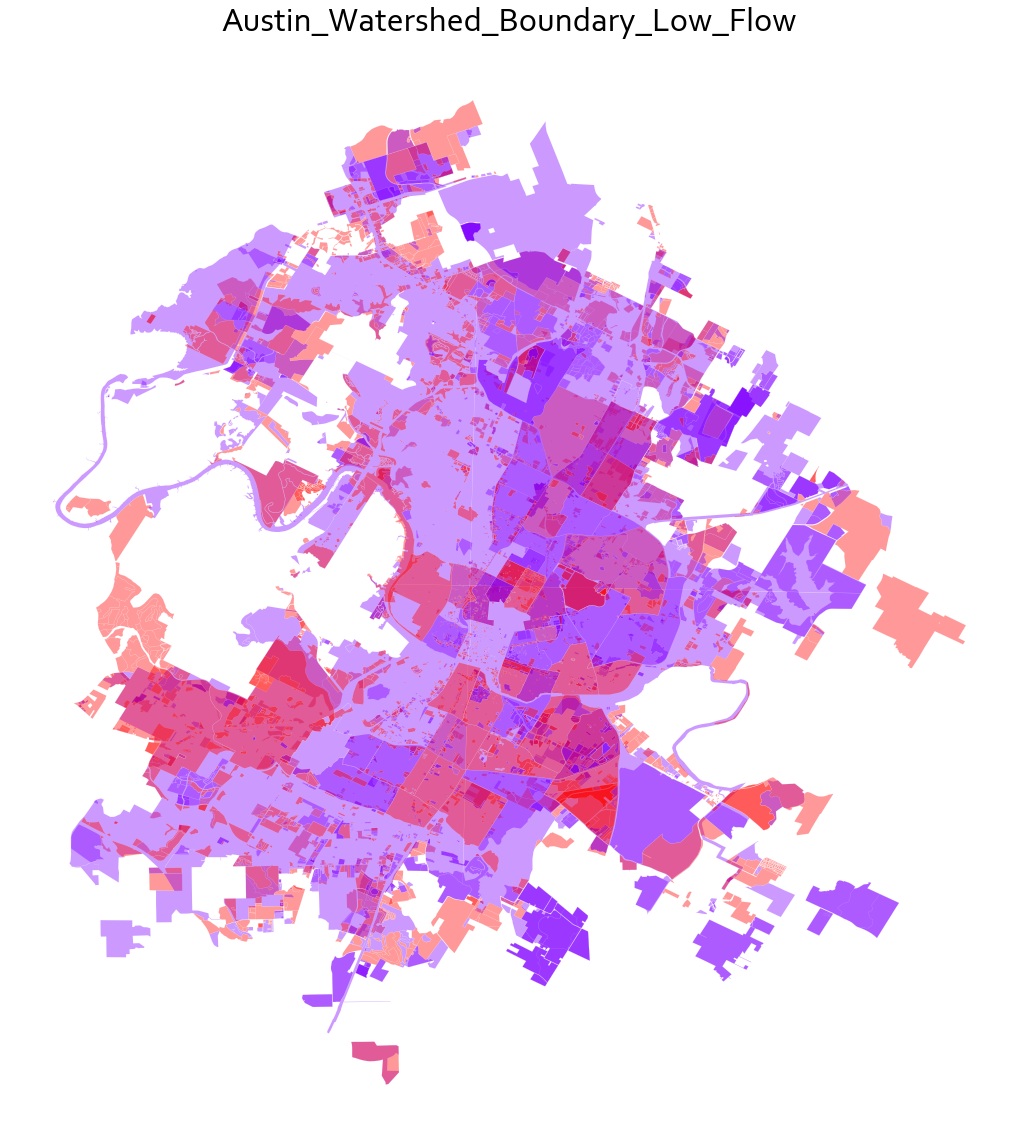

In [89]:
fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
ax = Austin_ZoningOrdinance.plot(ax=ax, cmap='rainbow_r', column='zoning_ord', edgecolor='#FFFFFF', linewidth=0.2, alpha = 0.4)
ax.set_title("Austin_Watershed_Boundary_Low_Flow", fontdict={"family":"Corbel"}, pad=20, size=34)
plt.savefig('Austin_Watershed_Boundary_Low_Flow',transparent=True);

In [90]:
AustinSidewalks = "C:\\Users\\lilyx\\DataViz\\Data\\AustinSidewalks\\geo_export_18962823-37d4-4195-90f9-07d56fde2ab5.shp"
AustinSidewalks = gpd.read_file(AustinSidewalks)
AustinSidewalks.head(1)

created_by date_creat time_creat     full_stree          functional  \
0       None       None       None  SKY HARBOR DR  PENDING ASSESSMENT   

       modified_b  date_modif    time_modif  objectid pedestrian  shape_leng  \
0  COACD\gentlesc  2017-05-31  13:55:49.000     107.0   DRIVEWAY   11.805359   

   sidewalks_                                           geometry  
0    278838.0  LINESTRING (-97.62972 30.16942, -97.62969 30.1...

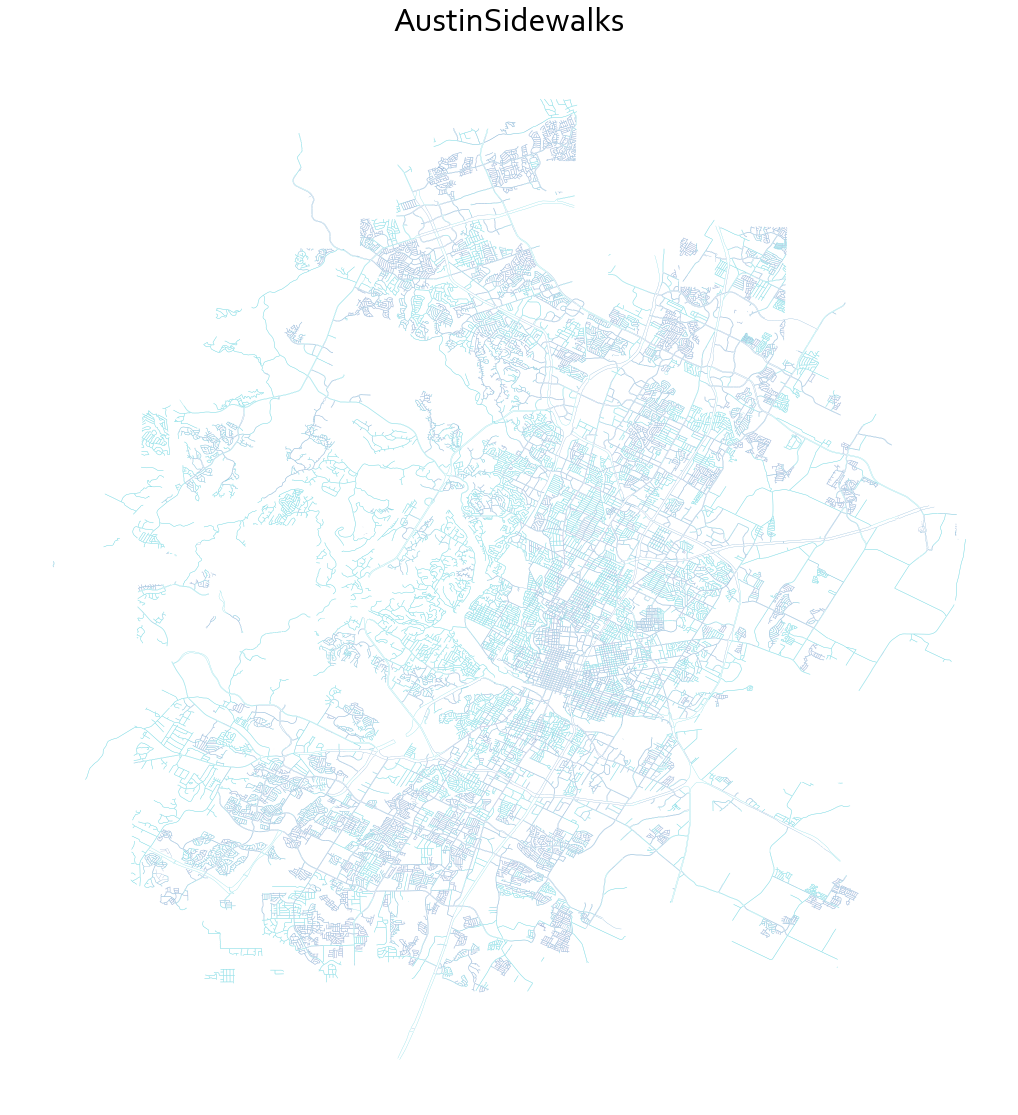

In [94]:
fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
ax = AustinSidewalks.plot(ax=ax, cmap='tab10_r', column='pedestrian', edgecolor='#FFFFFF', linewidth=0.2, alpha = 0.8)
ax.set_title("AustinSidewalks", fontdict={"family":"Corbel"}, pad=20, size=34)
plt.savefig('AustinSidewalks',transparent=True);

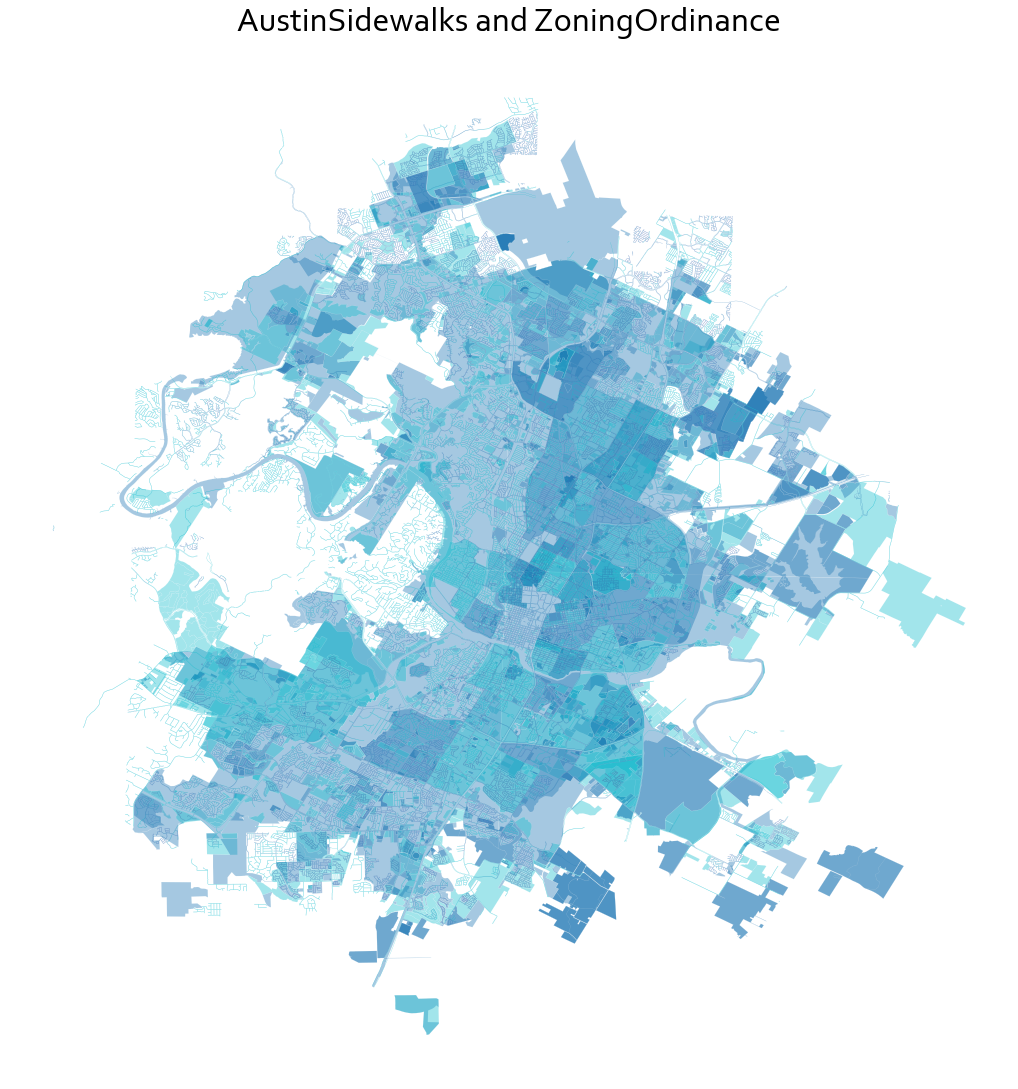

In [93]:
fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
ax = AustinSidewalks.plot(ax=ax, cmap='tab10_r', column='pedestrian', edgecolor='#FFFFFF', linewidth=0.2, alpha = 0.8, zorder=2)
ax = Austin_ZoningOrdinance.plot(ax=ax, cmap='tab10_r', column='zoning_ord', edgecolor='#FFFFFF', linewidth=0.2, alpha = 0.4, zorder=1)
ax.set_title("AustinSidewalks and ZoningOrdinance", fontdict={"family":"Corbel"}, pad=20, size=34)
plt.savefig('AustinSidewalks_ZoningOrdinance',transparent=True);

In [95]:
AustinStreetCenterline = "C:\\Users\\lilyx\\DataViz\\Data\\AustinStreetCenterline\\geo_export_8ddc937a-bb38-48e1-9f6e-0531e8dfdfca.shp"
AustinStreetCenterline = gpd.read_file(AustinStreetCenterline)
AustinStreetCenterline.head(1)

built_stat     cad_id created_by  date_creat    time_creat  elevation_  \
0         0.0  5713279.0    DHuerta  2019-06-11  10:02:13.000         0.0   

   elevatio_2 full_stree  left_block  left_blo_2  left_from_  left_to_ad  \
0         0.0  RUEDAS RD     12200.0     12208.0     12200.0     12208.0   

     miles modified_b  date_modif    time_modif  objectid one_way  posted_spe  \
0  0.05546   KDelisio  2019-07-01  12:41:57.000  125766.0       B         NaN   

  prefix_dir prefix_typ  right_bloc  right_bl_2  right_from  right_to_a  \
0       None       None     12201.0     12207.0     12201.0     12207.0   

   road_class     seconds  segment_id  shape_leng  speed_limi street_nam  \
0        15.0  199.657765   5713278.0  293.081973         1.0     RUEDAS   

   street_pla street_typ suffix_dir  \
0   5713257.0         RD       None   

                                            geometry  
0  LINESTRING (-97.62591 30.17801, -97.62586 30.1...

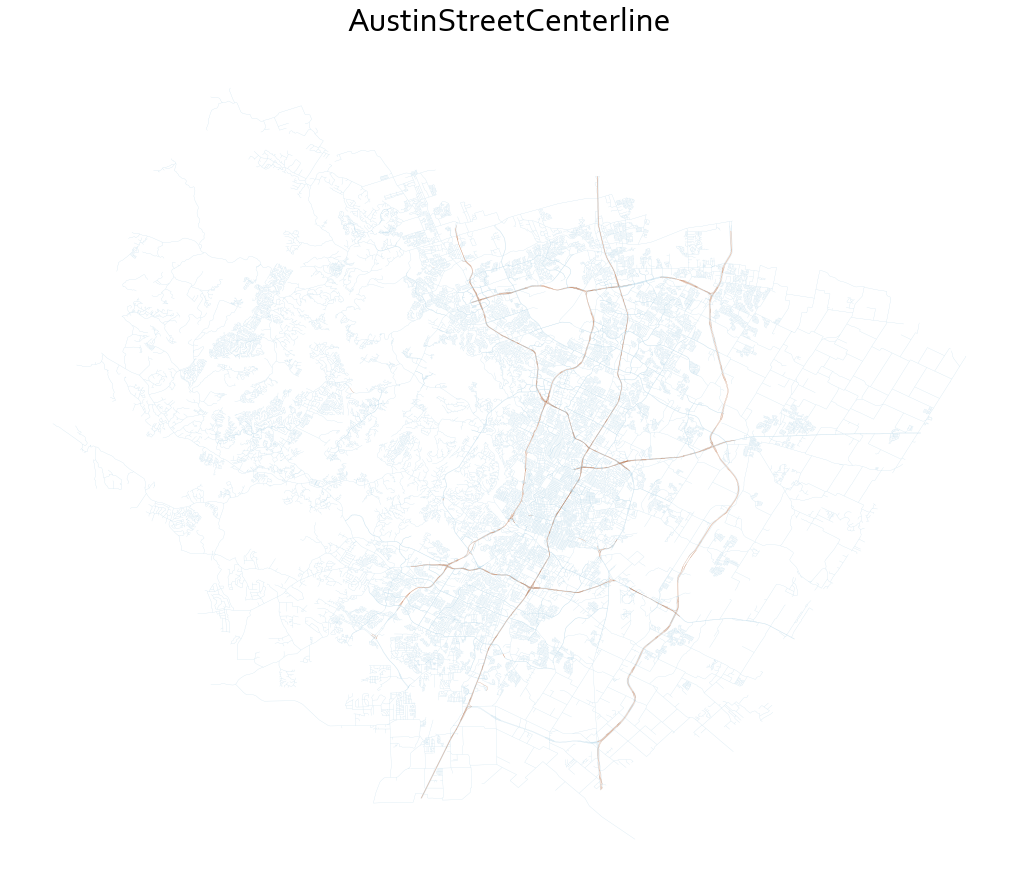

In [105]:
fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
ax = AustinStreetCenterline.plot(ax=ax, cmap='Paired', column='elevation_', edgecolor='#FFFFFF', linewidth=0.2, alpha = 0.8)
ax.set_title("AustinStreetCenterline", fontdict={"family":"Corbel"}, pad=20, size=34)
plt.savefig('AustinStreetCenterline',transparent=True);